In [1]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt

from operator import itemgetter  

from sklearn.metrics import plot_confusion_matrix

import os

# Hanno pred

In [2]:
hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_aug_last.csv" #hanno_icu_selected_preproc_last.csv"
hanno_non_icu_feat_path = "./output/hanno_non_icu_selected_preproc_aug_last.csv" #hanno_non_icu_selected_preproc_last.csv"

In [3]:
hanno_icu_feat = pd.read_csv(hanno_icu_feat_path)
hanno_icu_feat = hanno_icu_feat.iloc[:,1:].to_numpy()

print(hanno_icu_feat.shape) 

(500, 18)


In [4]:
hanno_non_icu_feat = pd.read_csv(hanno_non_icu_feat_path)
hanno_non_icu_feat = hanno_non_icu_feat.iloc[:,1:].to_numpy()

print(hanno_non_icu_feat.shape)

(486, 18)


In [5]:
#concatenate
last_features = np.concatenate((hanno_icu_feat, hanno_non_icu_feat), axis=0)
print(last_features.shape)

#normalize
hanno_features_norm = (last_features - last_features.mean(axis=0)) / last_features.std(axis=0)  
print(hanno_features_norm.shape)

hanno_features_norm[np.isnan(hanno_features_norm)] = 0

(986, 18)
(986, 18)


In [6]:
Y_hanno = np.zeros((last_features.shape[0],))
Y_hanno[0:hanno_icu_feat.shape[0],] = 1
Y_hanno.shape

(986,)

In [7]:
features = hanno_features_norm

max_depth_tree = 4
min_samples_leaf = 20
clf = tree.DecisionTreeClassifier(class_weight={0:1,1:1},max_depth=max_depth_tree, min_samples_leaf=min_samples_leaf)

clf = clf.fit(features, Y_hanno)
y_pred = clf.predict(hanno_features_norm)

print(classification_report(Y_hanno, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.76      0.83       486
         1.0       0.80      0.92      0.86       500

    accuracy                           0.84       986
   macro avg       0.85      0.84      0.84       986
weighted avg       0.85      0.84      0.84       986



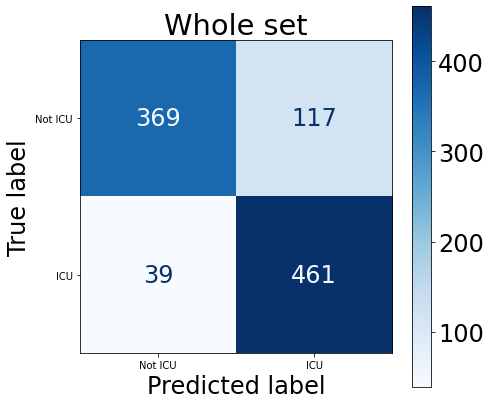

In [8]:
clf_= clf #clf_logit

fig, ax = plt.subplots(figsize=(7,7))
plt.rcParams.update({'font.size': 24})


disp = plot_confusion_matrix(clf_, features, Y_hanno,
                             display_labels=['Not ICU','ICU'],
                             cmap=plt.cm.Blues,
                             ax=ax)

disp.ax_.set_title('Whole set')

label_font = {'size':'24'}  # Adjust to fit
ax.set_xlabel('Predicted label', fontdict=label_font);
ax.set_ylabel('True label', fontdict=label_font);

## Cross-val

In [9]:
# cross-validation

from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_predict(clf, features, Y_hanno, cv=35)

print(confusion_matrix(Y_hanno, cv_scores))
print(classification_report(Y_hanno, cv_scores))

[[357 129]
 [ 79 421]]
              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77       486
         1.0       0.77      0.84      0.80       500

    accuracy                           0.79       986
   macro avg       0.79      0.79      0.79       986
weighted avg       0.79      0.79      0.79       986



# Severity scoring

## Fit classifier based on Cohen's

In [10]:
last_features_class1_path = "./output/went_icu_sel_proc_aug_last.csv" #"./output/1-2_icu_18feat.csv"
last_features_class2_path = "./output/not_went_icu_sel_proc_aug_last.csv" #"./output/1-2_not_icu_18feat.csv"

In [11]:
last_features_class1 = pd.read_csv(last_features_class1_path)
last_features_class1 = last_features_class1.iloc[:,1:].to_numpy()

print(last_features_class1.shape)

last_features_class2 = pd.read_csv(last_features_class2_path)
last_features_class2 = last_features_class2.iloc[:,1:].to_numpy()

print(last_features_class2.shape)

#concatenate
last_features = np.concatenate((last_features_class1, last_features_class2), axis=0)
print(last_features.shape)

#normalize
last_features_norm = (last_features - last_features.mean(axis=0)) / last_features.std(axis=0)  
print(last_features_norm.shape)

Y = np.zeros((last_features.shape[0],))
Y[0:last_features_class1.shape[0],] = 1
Y.shape

features = last_features_norm
#features_names_ = feature_names

(455, 18)
(585, 18)
(1040, 18)
(1040, 18)


In [12]:
from sklearn.linear_model import LogisticRegression, LinearRegression

#clf_logit = LogisticRegression(random_state=0).fit(features, Y) 
clf_lin = LinearRegression().fit(features, Y) #[:,[4, 2, 16, 11, 15]]

In [13]:
dataset_path = './datasets/hanno_repo'
metadata = pd.read_csv(os.path.join(dataset_path,'data.csv'))

In [14]:
id_img_patient = metadata['patient_id'].values
print('no of samples =', len(id_img_patient))

no of samples = 243


In [15]:
lst_of_patients = np.unique(id_img_patient)
print('no of unique patients =',len(lst_of_patients))

no of unique patients = 71


In [16]:
#Load features
hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_last.csv"
#hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_last.csv"

hanno_icu_feat = pd.read_csv(hanno_icu_feat_path)
hanno_icu_feat = hanno_icu_feat.iloc[:,1:].to_numpy()

#normalize
hanno_icu_feat_norm = (hanno_icu_feat - hanno_icu_feat.mean(axis=0)) / hanno_icu_feat.std(axis=0)  


#Load images ids
images_id_path = './output/hanno_icu_selected_preproc_last.txt'
with open(images_id_path) as imgs_id:
    imgs_ids = imgs_id.read().split(',')

,patient_id,image_id,sex,age,size,weight,admission_offset,icu_admission_offset,icu_release_offset,death_offset,...,ldh_offset,ldh_val,lymphocytes_offset,lymphocytes_val,neutrophils_offset,neutrophils_val,pco2_offset,pco2_val,po2_offset,po2_val
22,189daebe,90070cbc,m,NaN,NaN,NaN,0,0.0,49.0,NaN,...,0.0,705.0,0.0,0.8,0.0,6.8,0.0,35.0,0.0,130.0
23,189daebe,f567c33c,m,NaN,NaN,NaN,-8,-8.0,41.0,NaN,...,0.0,350.0,0.0,0.8,0.0,6.0,-1.0,65.0,-1.0,75.0
24,189daebe,7a030330,m,NaN,NaN,NaN,-18,-18.0,31.0,NaN,...,0.0,520.0,0.0,1.1,0.0,4.9,0.0,50.0,0.0,70.0
25,189daebe,00870a9c,m,NaN,NaN,NaN,-22,-22.0,27.0,NaN,...,0.0,420.0,0.0,1.6,0.0,5.1,0.0,60.0,0.0,70.0
26,189daebe,d15bf071,m,NaN,NaN,NaN,-24,-24.0,25.0,NaN,...,0.0,470.0,0.0,1.8,0.0,7.1,0.0,60.0,0.0,65.0
27,189daebe,35b446ce,m,NaN,NaN,NaN,-28,-28.0,21.0,NaN,...,0.0,480.0,-2.0,1.7,-2.0,6.9,0.0,50.0,0.0,80.0
28,189daebe,00d96e05,m,NaN,NaN,NaN,-30,-30.0,19.0,NaN,...,0.0,770.0,-4.0,1.7,-4.0,6.9,0.0,50.0,0.0,70.0
29,189daebe,3c8a0876,m,NaN,NaN,NaN,-42,-42.0,7.0,NaN,...,-1.0,280.0,-1.0,1.2,-1.0,7.4,0.0,40.0,0.0,80.0
30,189daebe,6646071b,m,NaN,NaN,NaN,-52,-52.0,-3.0,NaN,...,0.0,245.0,-11.0,1.2,-11.0,7.4,0.0,40.0,0.0,65.0


Patient no 9 has 9 images. 6 availiable
image 90070cbc - score: 0.2409229985812867
image f567c33c - score: 0.4818159454953679
image 7a030330 - score: 0.49778262856279193
image 00870a9c - score: 0.624103650920321
image d15bf071 - score: 0.459590333031373
image 35b446ce - score: 0.4743636264550786
img 00d96e05 not in selected dir
img 3c8a0876 not in selected dir
img 6646071b not in selected dir


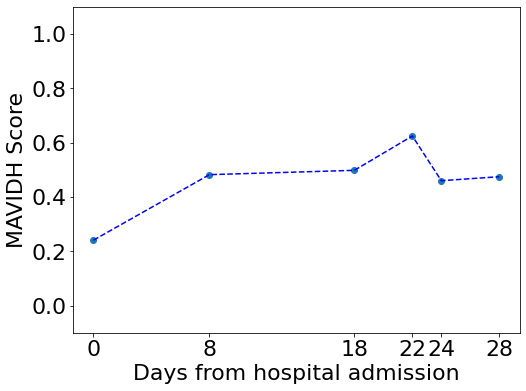

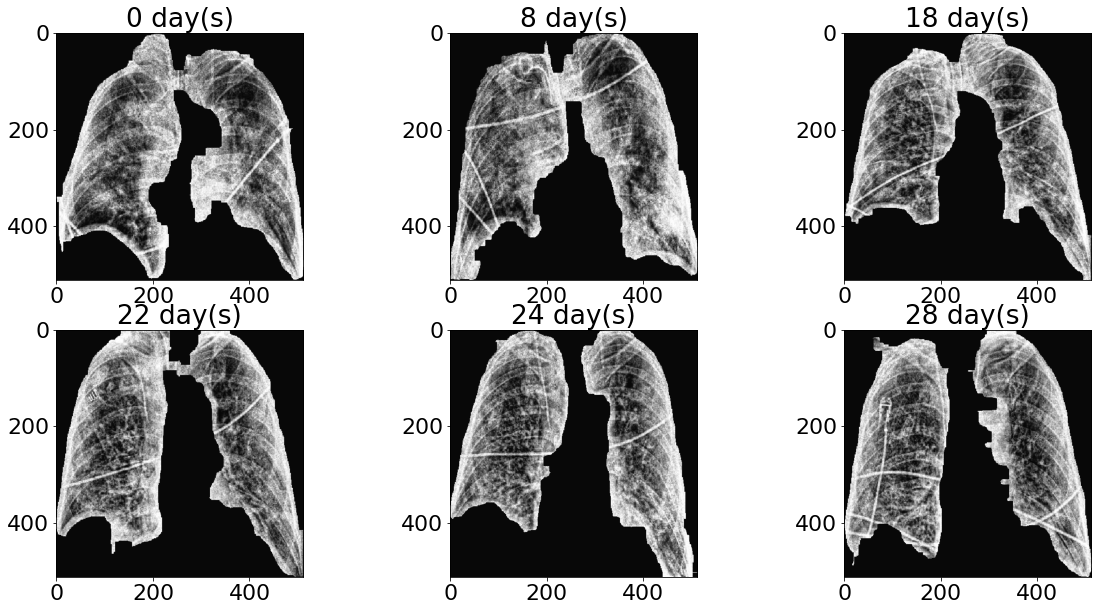

In [17]:
import matplotlib.image as mpimg

hanno_img_dir =  "output/hanno_icu_selected_preproc/"
imgs_hanno = os.listdir(hanno_img_dir)

idx_patient = 9
#idx_patient+=1

#check metadata
imgs_from_patient = metadata['image_id'][metadata['patient_id']==lst_of_patients[idx_patient]].values
display(metadata[metadata['patient_id']==lst_of_patients[idx_patient]])

days_offset = metadata['admission_offset'][metadata['patient_id']==lst_of_patients[idx_patient]].values
days_offset = days_offset * -1


imgs_in_dir = [i for i in imgs_from_patient if (i + '.png') in imgs_hanno]
print('Patient no',str(idx_patient) ,'has',len(imgs_from_patient),'images.',  len(imgs_in_dir), 'availiable')

#Predict score
scores=[]
indexes=[]
offsets=[]
for idx_img, img in enumerate(imgs_from_patient):
    if (img + '.png') in imgs_hanno:        
        index = imgs_ids.index(img + '.png')
        #score = clf_logit.predict_proba(hanno_icu_feat_norm)[index][1]
        score = clf_lin.predict(hanno_icu_feat_norm)[index]
        scores.append(score)
        indexes.append(index)
        print('image', img,'-','score:',score)
        offsets.append(days_offset[idx_img])
    else:
        print('img', img, 'not in selected dir')

plt.rcParams.update({'font.size': 22})
        
#plot scores
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim(0,1)
plt.scatter(offsets,scores)

ax.set_ylim(-0.1, 1.1)
ax.set_xticks(offsets)

#z = np.polyfit(offsets, scores, 1)
#p = np.poly1d(z)
plt.plot(offsets,scores,"b--")

ax.set_ylabel('MAVIDH Score')
ax.set_xlabel('Days from hospital admission')

n_col = 3

if len(indexes) > 0:
    fig, axs = plt.subplots(int(np.ceil(len(indexes)/n_col)), n_col, figsize=(20, 10))
    for i, idx in enumerate(indexes):
        title_ims = str(offsets[i]) + ' day(s)'
        try:
            img = mpimg.imread(os.path.join(hanno_img_dir,imgs_ids[idx]))            
            if int(np.ceil(len(indexes)/n_col)) > 1:
                axs[int(i/n_col),i-(int(i/n_col)*n_col)].imshow(img)
                axs[int(i/n_col),i-(int(i/n_col)*n_col)].set_title(title_ims) #offset[i],
            else:
                
                axs[i-(int(i/n_col)*n_col)].imshow(img)
                axs[int(i/n_col),i-(int(i/n_col)*n_col)].set_title(title_ims) #offset[i],
        except:
            pass
                 
                 
    

In [18]:
# def running_mean(x, N):
#     cumsum = np.cumsum(np.insert(x, 0, 0)) 
#     return (cumsum[N:] - cumsum[:-N]) / float(N)

# run_mean = running_mean(scores,3)

# fig, ax = plt.subplots(figsize=(10,10))
# ax.set_ylim(0,1)
# plt.plot(run_mean)

## Grouping test

In [19]:
# load metadata 
#dataset_path = './datasets/hanno_repo'
dataset_path = './output/'
#metadata = pd.read_csv(os.path.join(dataset_path,'data.csv'))
metadata = pd.read_csv(os.path.join(dataset_path,'hanno_metadata.csv'))
metadata.head()

,patient_id,image_id,sex,age,size,weight,admission_offset,icu_admission_offset,icu_release_offset,death_offset,...,ldh_offset,ldh_val,lymphocytes_offset,lymphocytes_val,neutrophils_offset,neutrophils_val,pco2_offset,pco2_val,po2_offset,po2_val
0,024e7871,fff13f3a,f,NaN,NaN,NaN,0,NaN,NaN,NaN,...,NaN,NaN,0.0,1.8,0.0,3.1,0.0,30.0,0.0,30.0
1,042f06a9,b343e657,m,NaN,NaN,NaN,0,0.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,45.0,0.0,55.0
2,042f06a9,c9280a30,m,NaN,NaN,NaN,-2,-2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,40.0,-1.0,80.0
3,042f06a9,53c9be49,m,NaN,NaN,NaN,-5,-5.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,35.0,-1.0,105.0
4,04a33bab,6b5af975,m,NaN,NaN,NaN,0,0.0,0.0,NaN,...,0.0,295.0,0.0,2.7,0.0,6.2,0.0,30.0,0.0,165.0


In [20]:
# make group of patients - before admission - vicinity of admission - vicinity of release - after release

group_boundary = 2 #days

## no icu data
patients_no_icu_data = metadata[metadata["icu_admission_offset"].isnull()]['image_id'].values
print(len(patients_no_icu_data),'patients without icu data')

## before adimission
patients_b4_adm = metadata[metadata["icu_admission_offset"]>=group_boundary]['image_id'].values
print(len(patients_b4_adm),'patients before admission')

## vicinity of admission
patients_vic_adm = metadata[(metadata["icu_admission_offset"]<group_boundary) & (metadata["icu_admission_offset"]>-group_boundary)]['image_id'].values
print(len(patients_vic_adm),'patients in vicinity of admission')

## in icu
patients_in_icu = metadata[(metadata["icu_admission_offset"]<0) & (metadata["icu_release_offset"]>0)]['image_id'].values
print(len(patients_in_icu),'patients in icu')

## vicinity of release
patients_vic_rel = metadata[(metadata["icu_release_offset"]<group_boundary) & (metadata["icu_release_offset"]>-group_boundary)]['image_id'].values
print(len(patients_vic_rel),'patients in vicinity of release')

## after release
patients_after_rel = metadata[metadata["icu_release_offset"]<=-group_boundary]['image_id'].values
print(len(patients_after_rel),'patients after release')

patients_group_ids = {}
patients_group_ids['no_icu'] = patients_no_icu_data
#patients_group_ids['b4_adm'] = patients_b4_adm
patients_group_ids['vic_adm'] = patients_in_icu
patients_group_ids['in_icu'] = patients_vic_adm
patients_group_ids['vic_rel'] = patients_vic_rel
#patients_group_ids['after_rel'] = patients_after_rel

57 patients without icu data
6 patients before admission
37 patients in vicinity of admission
112 patients in icu
31 patients in vicinity of release
25 patients after release


In [21]:
# load features

hanno_icu_feat_path = "./output/hanno_icu_selected_preproc_last.csv"
hanno_non_icu_feat_path = "./output/hanno_non_icu_selected_preproc_last.csv"

hanno_icu_feat = pd.read_csv(hanno_icu_feat_path)
hanno_icu_feat = hanno_icu_feat.iloc[:,1:].to_numpy()

hanno_non_icu_feat = pd.read_csv(hanno_non_icu_feat_path)
hanno_non_icu_feat = hanno_non_icu_feat.iloc[:,1:].to_numpy()

hanno_features = np.concatenate((hanno_icu_feat, hanno_non_icu_feat), axis=0)
hanno_features_norm = (hanno_features - hanno_features.mean(axis=0)) / hanno_features.std(axis=0)  

hanno_features_norm[np.isnan(hanno_features_norm)] = 0

In [22]:
# calculate scores

## fit classifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

#clf_logit = LogisticRegression(random_state=0).fit(features, Y) 

#calculate scores
group_score_our = {}
for group in patients_group_ids:
    group_score_our[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0
    for idx_patient, patient_id in enumerate(patients_group_ids[group]):                   
        
        if (patient_id + '.png') in imgs_hanno:
            valid_flag += 1
            index = imgs_hanno.index(patient_id + '.png')        
            #group_score_our[group].append(clf_logit.predict_proba(hanno_features_norm)[index][1])
            group_score_our[group].append(clf_lin.predict(hanno_features_norm)[index])
            
            
    print('group {0} has {1} valid images'.format(group,valid_flag))
            
                
#group_score_our

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


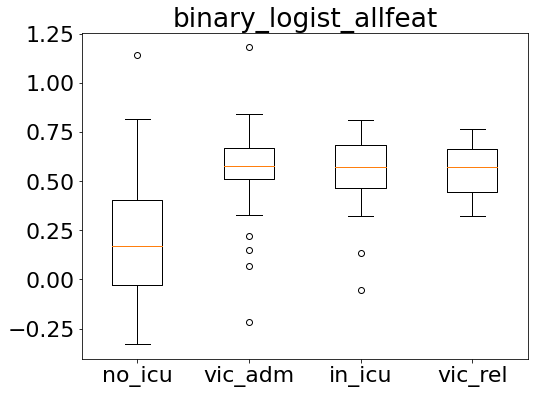

In [23]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_score_our[group] for group in group_score_our])
#ax1.boxplot(group_score_our['vic_rel'])
ax1.set_title('binary_logist_allfeat')
fontdict = {'fontsize': 14,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_score_our.keys()))#, fontdict=fontdict)

plt.show()

### Cohen severity comparison

In [24]:
cohen_sev_dir = './output'
sev_files = {'geo_ext': 'geo_ext.txt',
             'opacity': 'opct.txt'}

sev_files_scores = {}

for file_ in sev_files:
    with open(os.path.join(cohen_sev_dir,sev_files[file_])) as sev_scores:
        #imgs_ids = 
        sev_files_scores[file_] = sev_scores.read().split('\n')
        sev_files_scores[file_].pop(-1)
        sev_files_scores[file_] = [float(i) for i in sev_files_scores[file_]]

In [25]:
# group scores

metric = 'geo_ext' #'opacity'

group_score_geo_cohen = {}
for group in patients_group_ids:
    group_score_geo_cohen[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0
    for idx_patient, patient_id in enumerate(patients_group_ids[group]):                   
        
        if (patient_id + '.png') in imgs_hanno:
            valid_flag += 1
            index = imgs_hanno.index(patient_id + '.png')        
            group_score_geo_cohen[group].append(sev_files_scores[metric][index])
            
    print('group {0} has {1} valid images'.format(group,valid_flag))
            
                
#group_score_geo_cohen

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


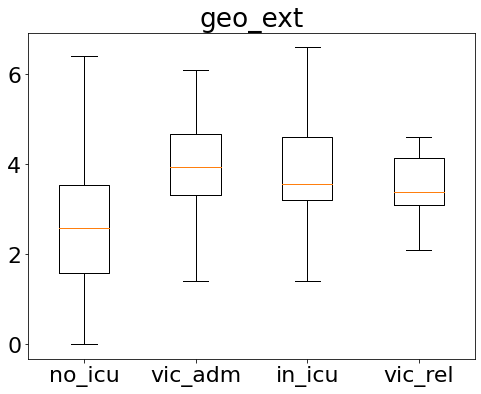

In [26]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_score_geo_cohen[group] for group in group_score_geo_cohen])
#ax1.boxplot(group_score_geo_cohen['vic_rel'])
ax1.set_title('geo_ext')
fontdict = {'fontsize': 12,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_score_geo_cohen.keys()))#, fontdict=fontdict)

plt.show()

In [27]:
# group scores

metric = 'opacity'

group_scores_opct_cohen = {}
for group in patients_group_ids:
    group_scores_opct_cohen[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0
    for idx_patient, patient_id in enumerate(patients_group_ids[group]):                   
        
        if (patient_id + '.png') in imgs_hanno:
            valid_flag += 1
            index = imgs_hanno.index(patient_id + '.png')        
            group_scores_opct_cohen[group].append(sev_files_scores[metric][index])
            
    print('group {0} has {1} valid images'.format(group,valid_flag))
            
                
#group_scores_opct_cohen

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


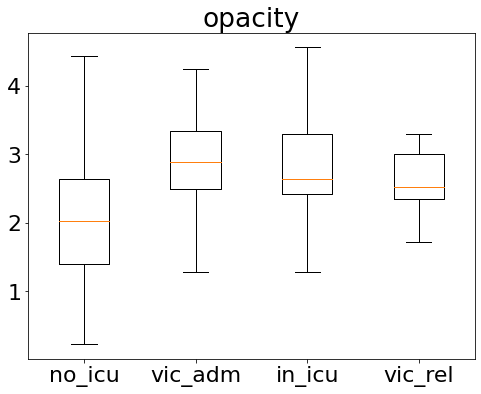

In [28]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_scores_opct_cohen[group] for group in group_scores_opct_cohen])
#ax1.boxplot(group_scores_opct_cohen['vic_rel'])
ax1.set_title('opacity')
fontdict = {'fontsize': 12,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_scores_opct_cohen.keys()))#, fontdict=fontdict)

plt.show()

## brescia comparison

In [29]:
import json 

score_path = './output/brescia_score.json'

with open(score_path) as f:
    brescia_scr = json.load(f)
    
brescia_scr['image_id'] = [i[:-4] for i in brescia_scr['image_id']]

In [30]:
# group scores

#metric = 'opacity'

group_scores_brescia = {}
for group in patients_group_ids:
    group_scores_brescia[group] = []
    
hanno_img_icu_dir = "output/hanno_icu_selected_preproc/"
#hanno_img_icu_dir = "output/hanno_icu_selected/"
imgs_hanno_icu = os.listdir(hanno_img_icu_dir)

hanno_img_non_icu_dir = "output/hanno_non_icu_selected_preproc/"
#hanno_img_non_icu_dir = "output/hanno_non_icu_selected/"
imgs_hanno_non_icu = os.listdir(hanno_img_non_icu_dir)

imgs_hanno = imgs_hanno_icu + imgs_hanno_non_icu


for group in patients_group_ids:
    valid_flag = 0

    for patient_id in patients_group_ids[group]:
        if (patient_id + '.png') in imgs_hanno:
            if patient_id in brescia_scr['image_id']:
                #count += 1
                valid_flag += 1
                group_scores_brescia[group].append(brescia_scr['score'][brescia_scr['image_id'].index(patient_id)])
                
    print('group {0} has {1} valid images'.format(group,valid_flag))

            
                

group no_icu has 54 valid images
group vic_adm has 72 valid images
group in_icu has 27 valid images
group vic_rel has 12 valid images


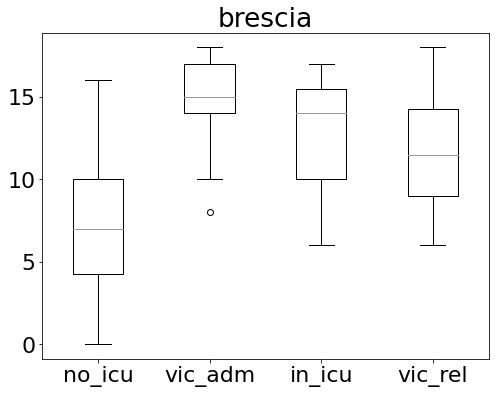

In [31]:
import matplotlib as mpl

fig1, ax1 = plt.subplots(figsize=(8, 6))

ax1.boxplot([group_scores_brescia[group] for group in group_scores_brescia])
#ax1.boxplot(group_scores_brescia['vic_rel'])
ax1.set_title('brescia')
fontdict = {'fontsize': 12,#mpl.rcParams['axes.titlesize'],
 'fontweight': mpl.rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': 'center'}
ax1.set_xticklabels(list(group_scores_brescia.keys()))#, fontdict=fontdict)

plt.show()

In [32]:
dic_of_scores = {'our':group_score_our,
                'cohen_geo':group_score_geo_cohen,
                'cohen_opct':group_scores_opct_cohen,
                'brescia':group_scores_brescia}

for dic in dic_of_scores:
    n_max = 0
    for group in dic_of_scores[dic]:
        if np.max(abs(np.asarray(dic_of_scores[dic][group]))) > n_max:
            n_max = np.max(abs(np.asarray(dic_of_scores[dic][group])))
            
    for group in dic_of_scores[dic]:
        dic_of_scores[dic][group] = [i/n_max for i in dic_of_scores[dic][group]]


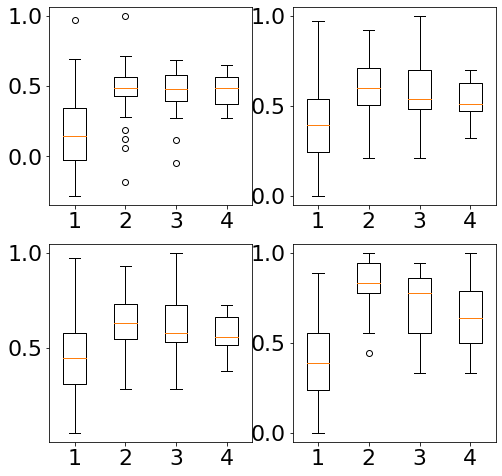

In [33]:
fig1, axs = plt.subplots(2,2, figsize=(8, 8))

axs[0,0].boxplot([group_score_our[group] for group in group_score_our])
axs[0,1].boxplot([group_score_geo_cohen[group] for group in group_score_geo_cohen])
axs[1,0].boxplot([group_scores_opct_cohen[group] for group in group_scores_opct_cohen])
axs[1,1].boxplot([group_scores_brescia[group] for group in group_scores_brescia])

plt.show()